# Principal Component Analysis (PCA)

In this note, I provie an example for principal component analysis. The analysis is carried out using SAS language.

Suppose we have X number of variables and we put them in the following matrix form:

$x = \left( \begin{array}{c}
x_1  \\
x_2  \\
... \\
x_p  \end{array} \right) $

The Variance-Covariance Matrix is defind as follows:

$\Sigma = \left(\begin{array}{cccc}
\sigma_{11}^2 & \sigma_{12} & ... & \sigma_{1p} \\
\sigma_{21} & \sigma_{22}^2 & ... & \sigma_{2p} \\
...&...&...&... \\
\sigma_{p1}^2 & \sigma_{2p} & ... & \sigma_{pp}^2 \\
\end{array} \right)$

The principal components are the linear combination of x-variables and the one that has maximum variance (among all linear combinations) is considered the first principal component, which accounts for as much variation in the data as possible.

$Y = \left(\begin{array}{c}
y_1 \\
y_2 \\
... \\
y_p \\ 
\end{array} \right) = 
\left(\begin{array}{c}
e_{11} X_1 + e_{12}X_1 + ...+ e_{1p}X_1 \\
e_{21} X_2  + e_{22} X_2 ... + e_{2p}X_2 \\
... \\
e_{p1}^2 X_p + e_{2p}X_p + ...+ e_{pp} X_p\\
\end{array} \right)$

The e values are eigenvectors or we can consider them as the coefficients in the linear regression:

$e_i$ = eigenvectors

$\lambda_i$ = eigenvalues

We can re-write $\Sigma$ in terms of eigenvectors and eigenvalues.
$\Sigma = \sum_{i=1}^{p} \lambda_i e_i e'_i$

trace($\Sigma$) = $\sigma_1^2 + \sigma_2^2 + ... + \sigma_p^2 $
$ = \lambda_1 + \lambda_2 + ... + \lambda_p$


Where Proportion of the total variation for every i,

$\lambda_i \over {\lambda_1+\lambda_2+...+\lambda_p} $

The total proportion of variation due to the first k components:
${{\lambda_1+\lambda_2+...+\lambda_k}\over {\lambda_1+\lambda_2+...+\lambda_p}} \sim 1 $

if this is large enough then we don't have to consider any more. The first K components would suffice. We must find k in such a way that the above ratio is cloes to one. 

Suppose a test case where we want to rank a few locations. However, the ranking can be done using several different variables such as : 

Climate and Terrain, Housing, Health Care & Environment, Crime, Transportation, Education, The Arts, Recreation, Economics

In the following SAS code, we will try to carry out the Principal Component Procedure.

First read the data from the stored location: 

In [ ]:
options ls=78;
title "PCA - Covariance Matrix - Ranks";
data places;
  infile "Storage/Folder/data.txt";

Then define a column for each nine variable as well as an ID column to identify the location we're looking at: 

In [ ]:
input climate housing health crime trans educate arts recreate econ id;

Then normalize the data by taking the logarithm of all variables. The reason being that the values tend to be skewed:

In [ ]:
  climate=log10(climate);
  housing=log10(housing);
  health=log10(health);
  crime=log10(crime);
  trans=log10(trans);
  educate=log10(educate);
  arts=log10(arts);
  recreate=log10(recreate);
  econ=log10(econ);
  run;

The princomp procedue will then carry out the principal component analysis. Make sure to pass on the "cov" option so that SAS uses the covariance-variance matrix to do the analysis as opposed to correlation matrix:

In [ ]:
proc princomp cov out=a;
  var climate housing health crime trans educate arts recreate econ;
  run;

The first result that shows up after running this piece of code is the following. It shows the Mean and starndard deviation of all nine variables: 

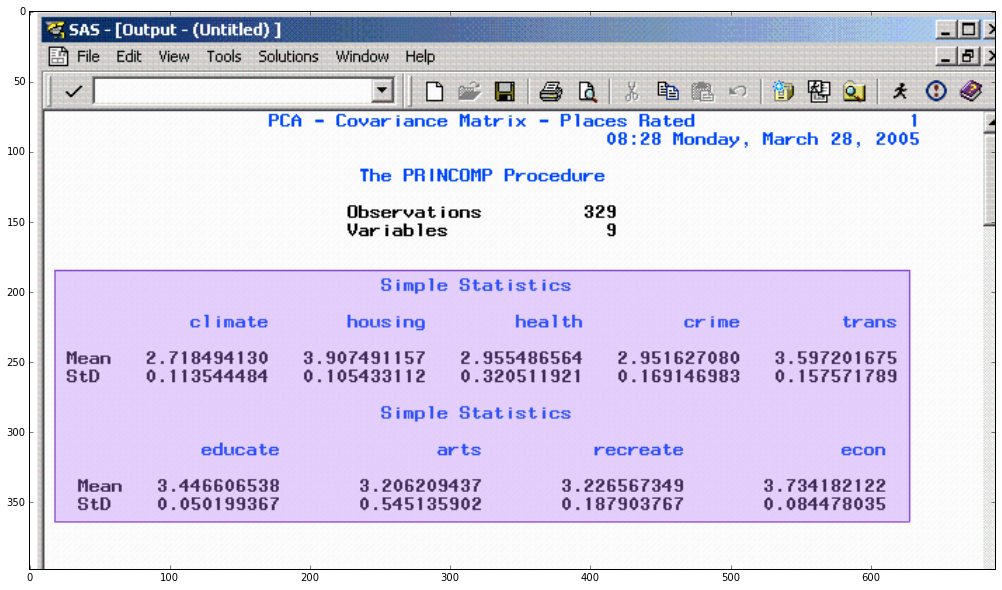

##### Followed by the variance-covariance matrix: 

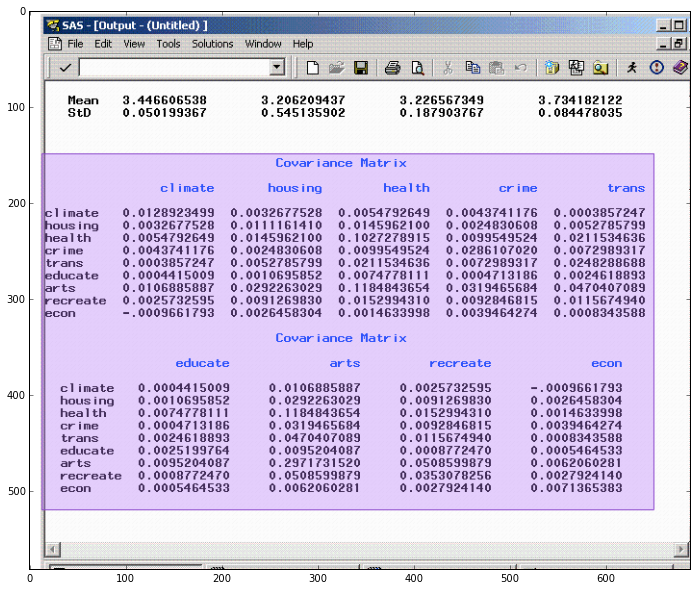

##### In the image shown below:

The important part however, is the eigenvalue and eigenvectors, the following shows them in descending order. If you add all of the eigen values you get the total variance of 0.5223. 
    
 The proportion of variation is also given by each $\lambda_i$ divided by the total $\sum \lambda$ which is given in the third column. So for example, aboute 72% of the variation is explained by the first eigenvalue (0.377).

 The cumulative percentage is shown in the fourth column of Eigenvalues matrix. It represents the Proportion of every new eigen vector added to the cumulative of the previous variable. It goes up until it reaches one. 

 Another way to put it is that, for instance 72% of the variation is explained by the first eigenvalue, then 82% is represented by the first two eigenvalues together and so on...

 In the second column, we look at the difference between every eigenvalue and it's next value. We are specially looking for sharp drops. This is the case in between the first and second eigenvalues.

 In the eigenvector table or matrix, each column represents the eigenvectors or coefficients for that linear combinations. we use this to compute the scores of the corresponding principal components (first, second,etc)

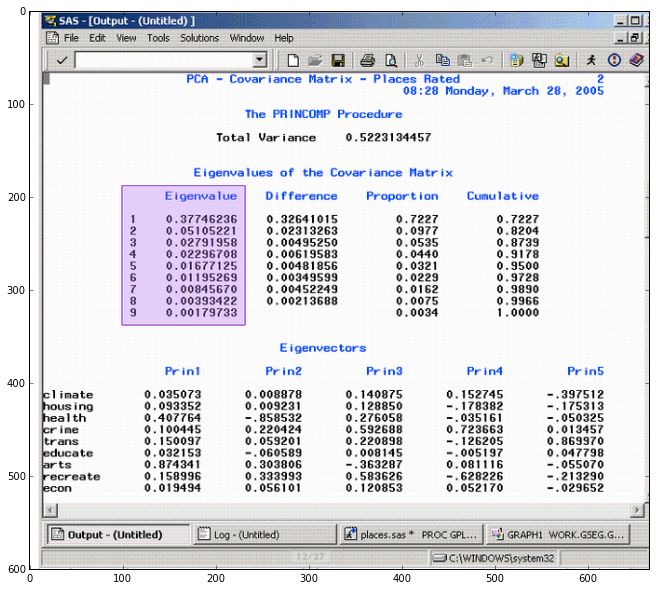

##### Then 
we use the "CORR" procedure to find the correlation between the principal component scores and the original variables: 

Note that we are passing on all the nine variables we originally defined as well as the first three princiapl components prin1-3. 
The relations are given in the image below:


In [ ]:
proc corr;
  var prin1 prin2 prin3 climate housing health crime trans educate arts 
      recreate econ;
  run;

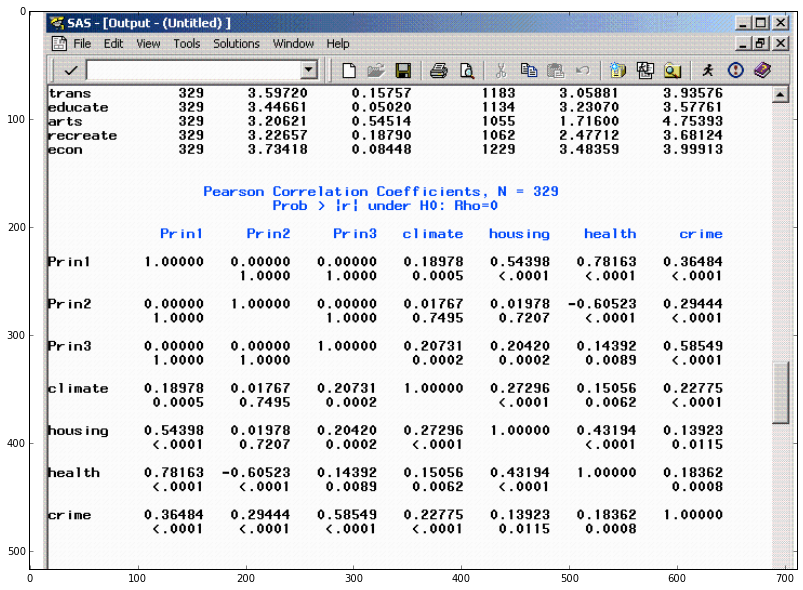

This block of code will plot first versus second principal components; 

In [ ]:
proc gplot;
  axis1 length=5 in;
  axis2 length=5 in;
  plot prin2*prin1 / vaxis=axis1 haxis=axis2;
  symbol v=J f=special h=2 i=none color=black;
  run;

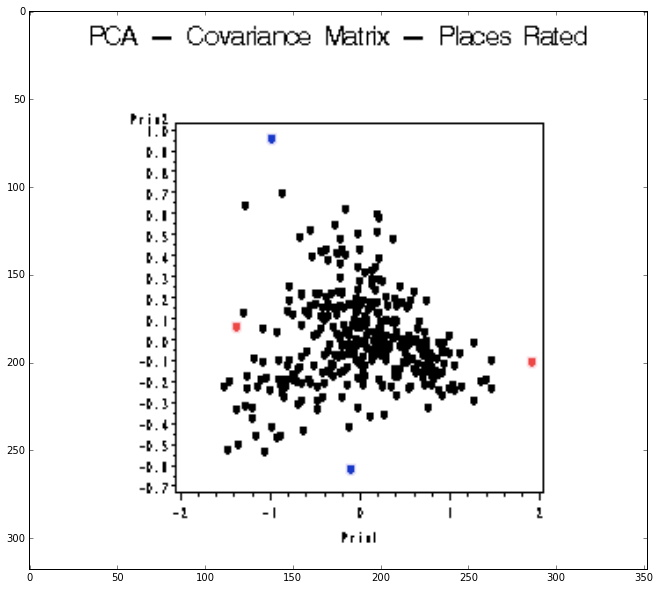